# Visualizing tweets and Logistic Regression

In [1]:
#Import the libraries
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
from utils import process_tweet, build_freqs

In [2]:
#Load the dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [3]:
#Combine all tweets
tweets = positive_tweets + negative_tweets
labels = np.append(np.ones((len(positive_tweets), 1)), np.zeros((len(negative_tweets), 1)), axis = 0)

In [4]:
#Split the data for training and testing
train_pos = positive_tweets[:4000]
train_neg = negative_tweets[:4000]

train_x = train_pos + train_neg
print("Training size: ", len(train_x))

Training size:  8000


In [5]:
#Load the extracted features
data = pd.read_csv('logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [6]:
#Separate the features and sentiment as target labels
X = data[['bias', 'positive', 'negative']].values
Y = data['sentiment'].values

print(X.shape)
print(Y.shape)

(8000, 3)
(8000,)


In [7]:
#Initialize random theta
theta = [7e-08, 0.0005239, -0.00055517]

Text(0, 0.5, 'Negative labels')

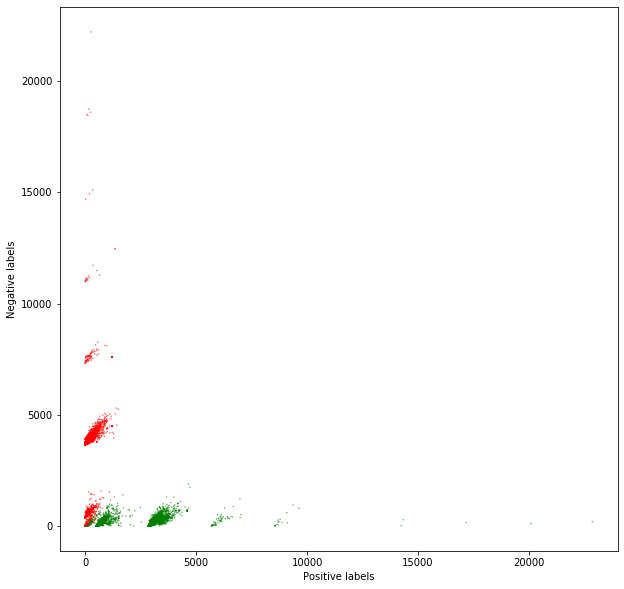

In [8]:
#Plot the samples in scatter plot
fig, ax = plt.subplots(figsize = (10, 10))

colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive labels")
plt.ylabel("Negative labels")

In [10]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

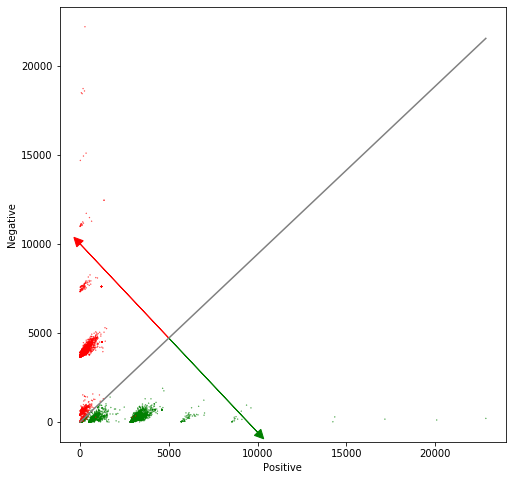

In [11]:
#Plot the samples
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()